In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
data=pd.read_csv("column_2C_weka.csv")

In [165]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [166]:
data.shape

(310, 7)

In [167]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [168]:
data['class'].replace({"Normal":0,"Abnormal":1},inplace=True)

In [169]:
data.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.353336
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.443687
class,0.353336,0.326063,0.312484,0.210602,-0.309857,0.443687,1.000000


In [170]:
from scipy.stats import ttest_ind

In [171]:
df0=data[data['class']==0]
df1=data[data['class']==1]

In [172]:
df0.shape,df1.shape

((100, 7), (210, 7))

In [173]:
for col in data.columns[:-1]:
    p_val=ttest_ind(df0[col],df1[col])
    print(col,p_val)

pelvic_incidence Ttest_indResult(statistic=-6.6285856350132955, pvalue=1.516337137438054e-10)
pelvic_tilt numeric Ttest_indResult(statistic=-6.053206646787071, pvalue=4.122674154069914e-09)
lumbar_lordosis_angle Ttest_indResult(statistic=-5.773180434184712, pvalue=1.898448510588465e-08)
sacral_slope Ttest_indResult(statistic=-3.7808470712114293, pvalue=0.00018769555657203096)
pelvic_radius Ttest_indResult(statistic=5.71945225076399, pvalue=2.5290220394265647e-08)
degree_spondylolisthesis Ttest_indResult(statistic=-8.688731198808457, pvalue=2.2012863107202555e-16)


#### between two groups the feature mean is same all are rejecting null hypothesis

In [174]:
X=data.drop('class',axis=1)
Y=data['class']

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param= {'n_neighbors': np.arange(1,50),'weights':['uniform','distance']}
GS= GridSearchCV(knn,param, cv=3,scoring='roc_auc')
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [179]:
GS.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [180]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=0)
par_dt= {'criterion':["entropy",'gini']}
GS_dt= GridSearchCV(dt,par_dt, cv=3,scoring='roc_auc')
GS_dt.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [181]:
GS_dt.best_params_

{'criterion': 'gini'}

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [183]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state = 0)
RF=RandomForestClassifier(n_estimators=6,random_state=0)
knn_final= KNeighborsClassifier(n_neighbors=14,weights='distance')

In [184]:
models=[]
models.append(('Logistic',LR))
models.append(('FGDT',DT))
models.append(('Randomforest',RF))
models.append(("KNN",knn_final))


Logistic: 0.931476 (0.001272)
FGDT: 0.790760 (0.002413)
Randomforest: 0.893146 (0.003090)
KNN: 0.893719 (0.001173)


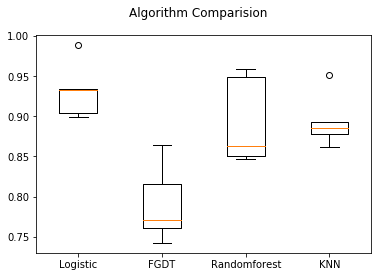

In [185]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### For random forest n_estimator find different n estmators to reduce the variace errors 